In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [0]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
import pandas as pd


In [63]:
X = pd.read_csv('/content/Milton SIC only numbers.csv')
X.head()

,SIC_code
0,1610
1,9100
2,18129
3,20590
4,21100


In [0]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [65]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.7668602508396846

In [66]:
Z[0]

array([4., 5., 0., 2.])

In [67]:
Z[1]

array([6., 7., 0., 2.])

In [68]:
Z[:20]

array([[  4.,   5.,   0.,   2.],
       [  6.,   7.,   0.,   2.],
       [  8., 229.,   0.,   3.],
       [ 10.,  11.,   0.,   2.],
       [ 12.,  13.,   0.,   2.],
       [ 18.,  19.,   0.,   2.],
       [ 21.,  22.,   0.,   2.],
       [ 23.,  24.,   0.,   2.],
       [ 25.,  26.,   0.,   2.],
       [ 27., 236.,   0.,   3.],
       [ 28.,  29.,   0.,   2.],
       [ 30., 238.,   0.,   3.],
       [ 36.,  37.,   0.,   2.],
       [ 38., 240.,   0.,   3.],
       [ 39.,  40.,   0.,   2.],
       [ 47.,  48.,   0.,   2.],
       [ 49.,  50.,   0.,   2.],
       [ 53.,  54.,   0.,   2.],
       [ 57.,  58.,   0.,   2.],
       [ 60.,  61.,   0.,   2.]])

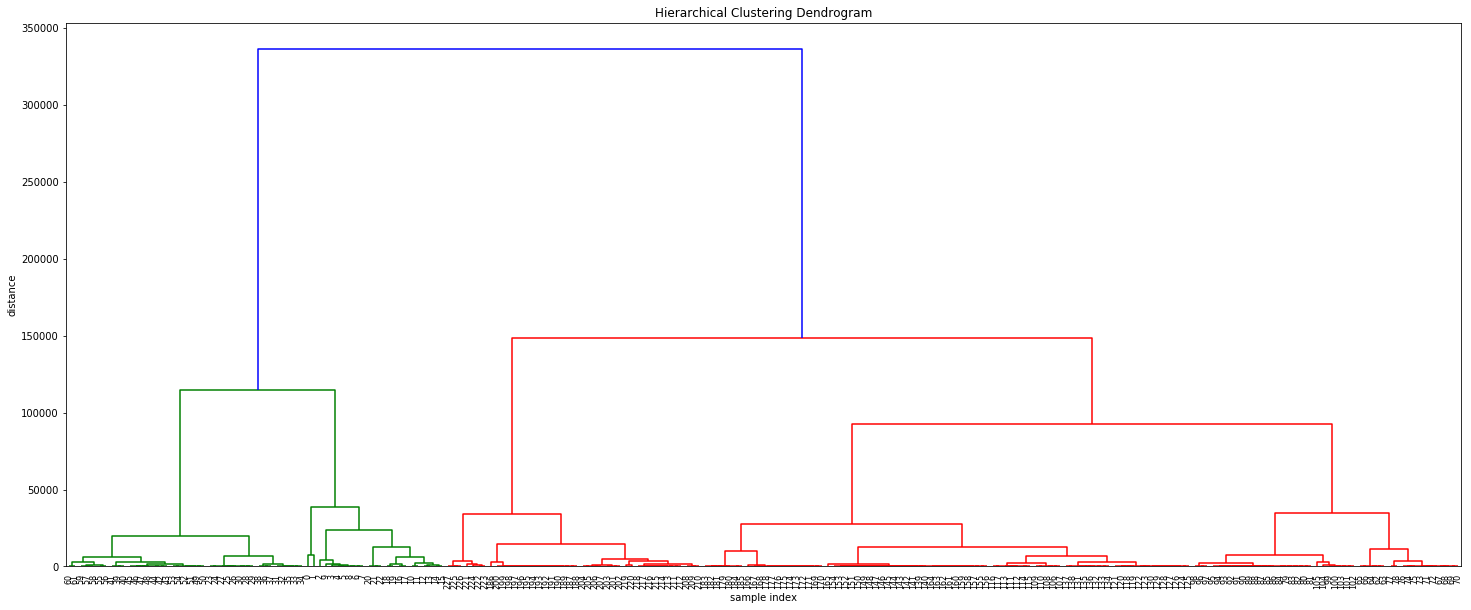

In [69]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [70]:
Z[-4:,2]

array([ 92737.35701, 114559.22769, 148579.26367, 336542.97185])

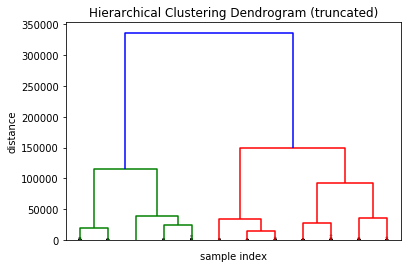

In [71]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

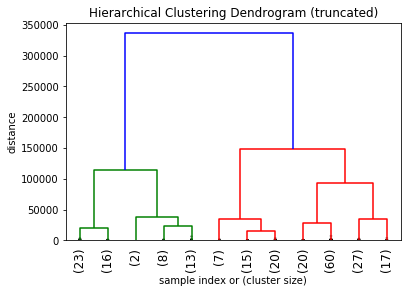

In [72]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

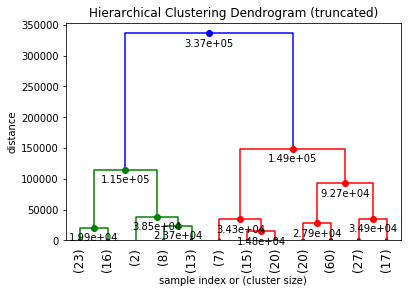

In [74]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [0]:
# set cut-off to 50
max_d = 200000  # max_d as in max_distance

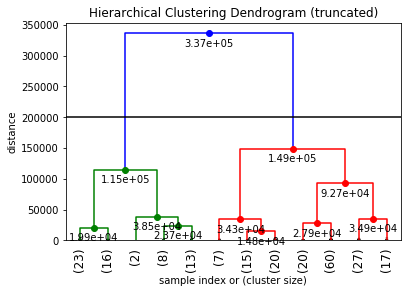

In [76]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

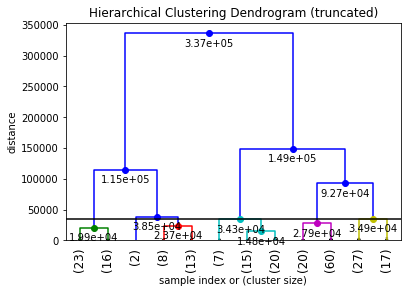

In [77]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=35000,
)
plt.show()

In [78]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1825.3088 ,  4256.4066 ,    24.     ,     4.24752],
       [ 3598.76892,  6489.77754,    15.     ,     3.10344],
       [ 3014.93036,  6532.52705,    22.     ,     3.80243],
       [ 3854.75753,  8367.83447,    18.     ,     3.63982],
       [ 3076.915  ,  7855.23369,    21.     ,     4.04897],
       [ 8234.1207 , 11712.15839,    12.     ,     2.58534],
       [ 7946.70384, 18619.74465,    28.     ,     4.5538 ],
       [10478.75814, 24047.37918,    24.     ,     4.32814],
       [15382.63484, 32213.87948,    28.     ,     4.13476],
       [33943.52202, 68215.26873,    29.     ,     4.43595]])

In [79]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[  5696.71041,   6665.85373,      7.     ,      2.13143],
       [  8094.4817 ,   8754.78945,      6.     ,      1.78701],
       [  8545.0393 ,   9752.66668,      7.     ,      1.97991],
       [  8804.84172,  12242.35177,      7.     ,      2.08353],
       [  8968.83675,  12031.23667,      7.     ,      2.15387],
       [ 17250.82196,  14017.18309,      5.     ,      1.51694],
       [ 28130.81437,  30265.48285,      7.     ,      2.13466],
       [ 30956.72618,  38714.93223,      7.     ,      2.15944],
       [ 50980.09251,  51455.83941,      7.     ,      1.89676],
       [112164.20714, 109584.19746,      7.     ,      2.04755]])

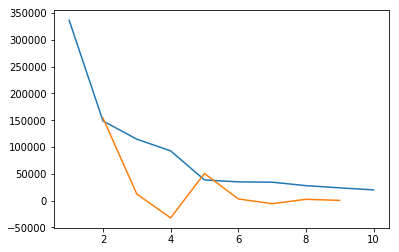

clusters: 2


In [80]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

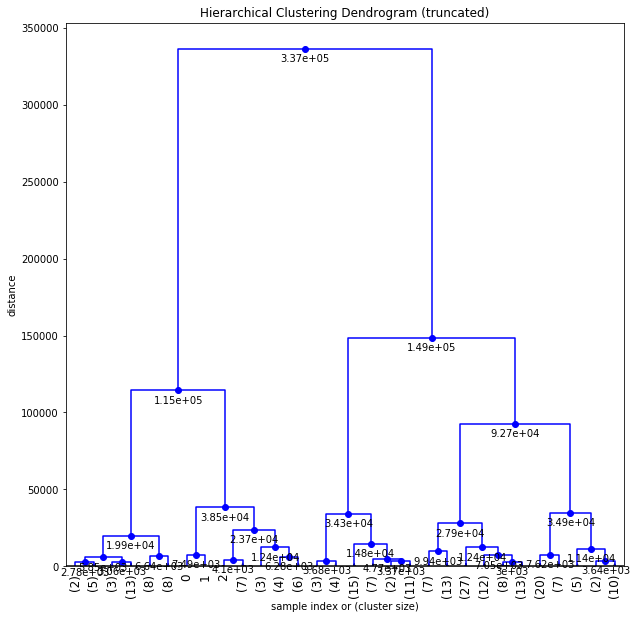

In [81]:
Z2 = linkage(X, 'ward')
plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z2,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=40,
    max_d=170,
)
plt.show()

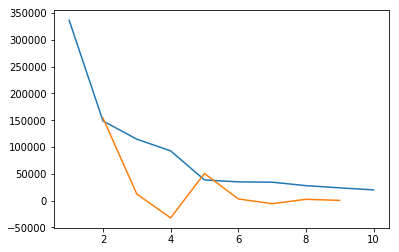

clusters: 2


In [82]:
last = Z2[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [83]:
print (inconsistent(Z2, 5)[-10:])

[[ 1825.3088   4256.4066     24.          4.24752]
 [ 3598.76892  6489.77754    15.          3.10344]
 [ 3014.93036  6532.52705    22.          3.80243]
 [ 3854.75753  8367.83447    18.          3.63982]
 [ 3076.915    7855.23369    21.          4.04897]
 [ 8234.1207  11712.15839    12.          2.58534]
 [ 7946.70384 18619.74465    28.          4.5538 ]
 [10478.75814 24047.37918    24.          4.32814]
 [15382.63484 32213.87948    28.          4.13476]
 [33943.52202 68215.26873    29.          4.43595]]


In [84]:
from scipy.cluster.hierarchy import fcluster
max_d = 200000
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [85]:
k=2
fcluster(Z, k, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [86]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 8, depth=10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)